# Comparative Subject TSAE

In [1]:
# !pip install torchinfo
import torch
import torch.nn as nn
from torchinfo import summary
import matplotlib.pyplot as plt
import os
import gc
# os.environ['OPENBLAS_NUM_THREADS'] = '1'
import numpy as np
import time
import CompMethods_V3 as TP
import DataSetting_v5 as DS

In [2]:
date = '20240917'
name = f'{date}_COMP_sub'
data_path = ['../dataset/Door_EXP/A208']
level = 'subject'

data_organizer = DS.DataOrganizer(name, data_path, level)
data_organizer.load()

Cross validation plan at subject level
Loading ../dataset/Door_EXP/A208...

Loaded 0709A23-csi.npy of shape (111248, 30, 3)
Loaded 0709A41-csi.npy of shape (248817, 30, 3)
Loaded 0709A24-csi.npy of shape (38347, 30, 3)
Loaded 0709A20-csi.npy of shape (209993, 30, 3)
Loaded 0709A14-csi.npy of shape (168611, 30, 3)
Loaded 0709A12-csi.npy of shape (151822, 30, 3)
Loaded 0709A02-csi.npy of shape (232687, 30, 3)
Loaded 0709A11-csi.npy of shape (219643, 30, 3)
Loaded 0709A50-csi.npy of shape (133412, 30, 3)
Loaded 0709A511-csi.npy of shape (62914, 30, 3)
Loaded 20240709_153519-rimg.npy of shape (4057, 128, 226)
Loaded 20240709_154950-rimg.npy of shape (6302, 128, 226)
Loaded 20240709_161802-rimg.npy of shape (3442, 128, 226)
Loaded 20240709_185105-rimg.npy of shape (6481, 128, 226)
Loaded 20240709_192745-rimg.npy of shape (7787, 128, 226)
Loaded 20240709_193501-rimg.npy of shape (3267, 128, 226)
Loaded 20240709_191754-rimg.npy of shape (5395, 128, 226)
Loaded 20240709_163045-rimg.npy of shap

### Teacher-Student AE

In [3]:
data_organizer.load_plan('../dataset/Door_EXP/subject_r0.2.pkl')
preprocess = DS.Preprocess(new_size=(128, 128))

def run_t():
    for i in range(6):
        data_organizer.gen_plan()
        train_loader, valid_loader, test_loader, current_test = data_organizer.gen_loaders(mode='t', num_workers=0)
        if current_test in ('higashinaka', 'jiao'):
            continue
        TSAE_T_trainer = TP.CompTrainer(name='AETeacher', mode='ae_t', mask=False,
                                        networks=[TP.ImageEncoder(latent_dim=128), 
                                                  TP.ImageDecoder(latent_dim=128)],
                                        lr=1e-4, epochs=10, cuda=gpu,
                                        preprocess = preprocess,
                                        modality = {'rimg', 'tag'},
                                        loss_optimizer = {'LOSS': [torch.optim.Adam, 1e-4]},
                                        train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader, 
                                        notion=f'{name}_{current_test}_TSAE')
        tsae_t_trained = TSAE_T_trainer.schedule()
        del TSAE_T_trainer
        del tsae_t_trained
        del train_loader
        del valid_loader
        del test_loader
        torch.cuda.empty_cache()
        gc.collect()
        break

Loaded plan!


Generating loaders for t: level = subject, current test = higashinaka
 Train dataset length = 9569
 Test dataset length = 2027
 Exported train loader of len 119, batch size = 64
 Exported valid loader of len 29, batch size = 64
 Exported test loader of len 32, batch size = 1

Generating loaders for t: level = subject, current test = jiao
 Train dataset length = 8308
 Test dataset length = 3288
 Exported train loader of len 103, batch size = 64
 Exported valid loader of len 25, batch size = 64
 Exported test loader of len 52, batch size = 1

Generating loaders for t: level = subject, current test = zhang
 Train dataset length = 9843
 Test dataset length = 1753
 Exported train loader of len 123, batch size = 64
 Exported valid loader of len 30, batch size = 64
 Exported test loader of len 28, batch size = 1

==========20240917_COMP_sub_zhang_TSAE AETeacher Training starting==========


  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

<Figure size 432x288 with 0 Axes>

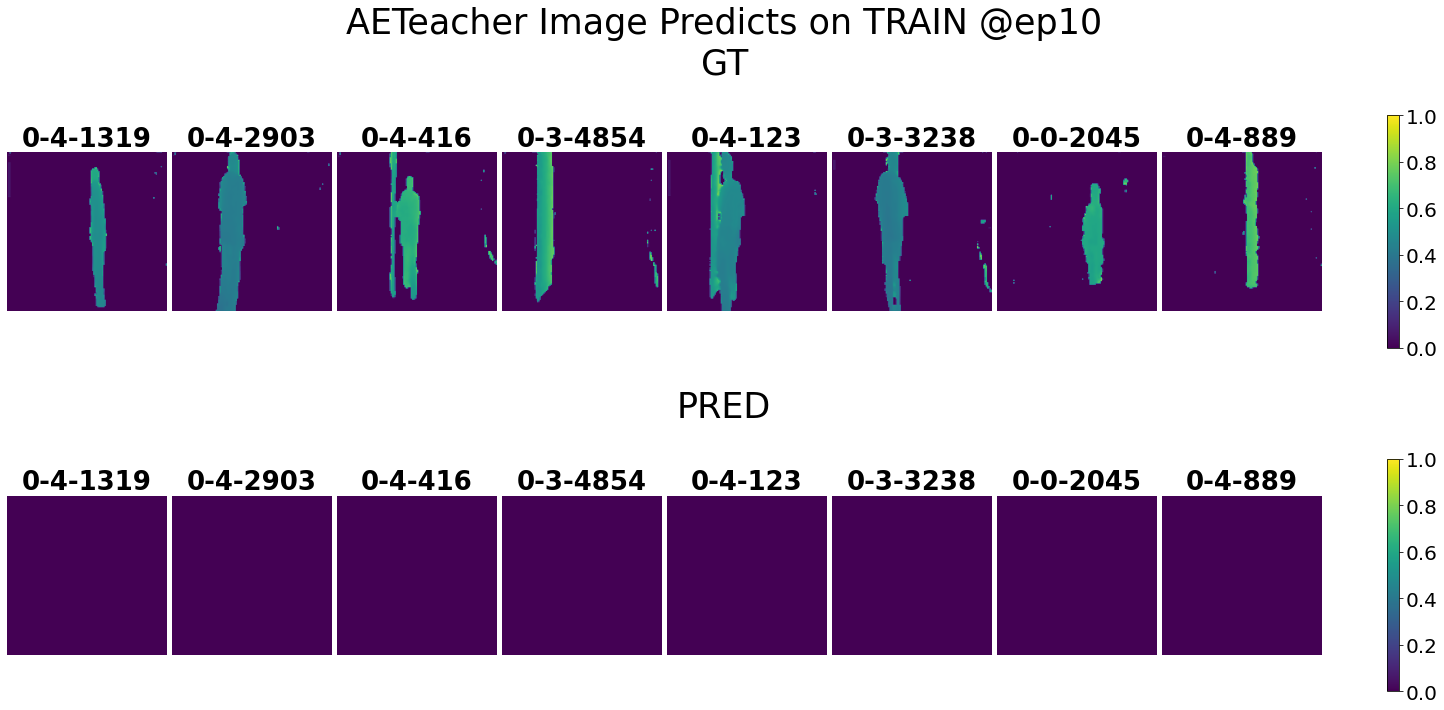

<Figure size 1440x720 with 0 Axes>

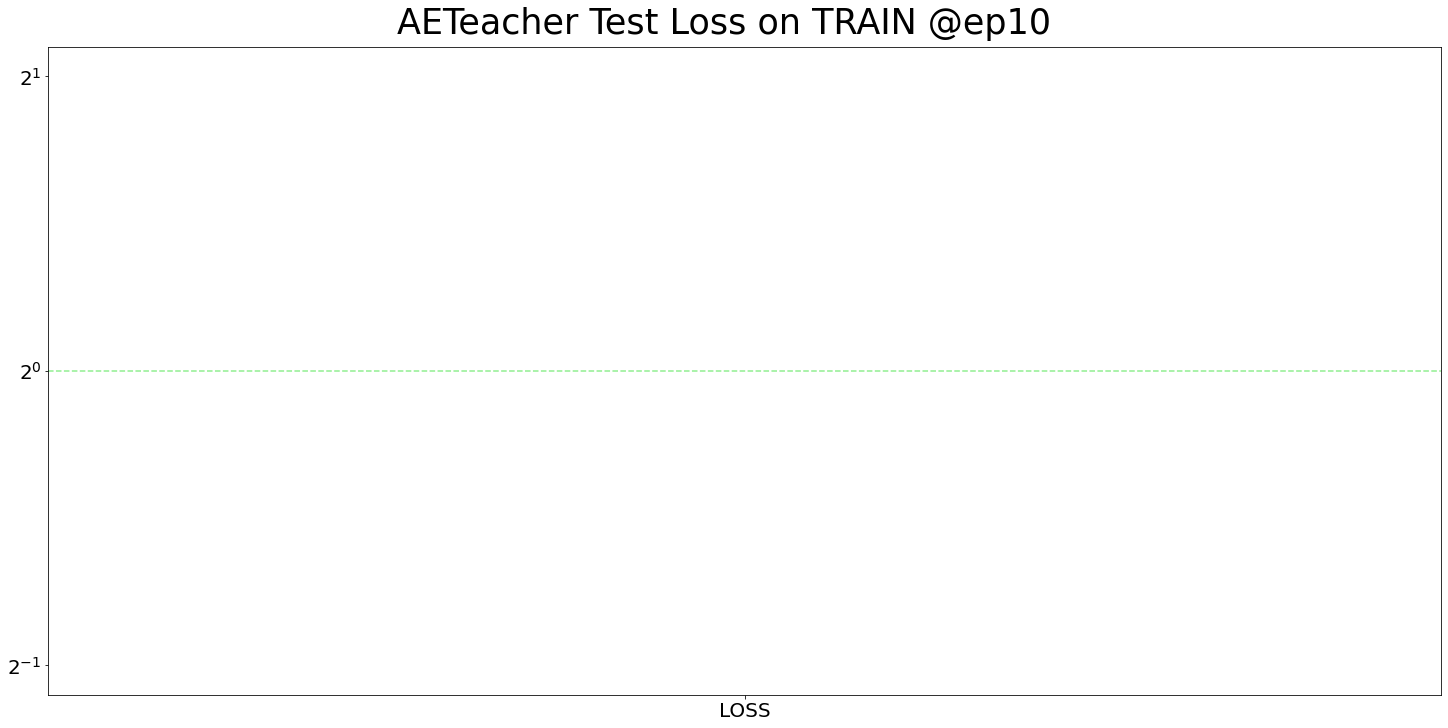

/home/bob/datastore/Models/Loss.py:234: RuntimeWarning: invalid value encountered in true_divide
  cdf = np.cumsum(hist / sum(hist))
/home/bob/datastore/Models/Loss.py:236: RuntimeWarning: invalid value encountered in true_divide
  axes[i].bar(bin_edges[1:], hist / max(hist), width=width, color='blue')


<Figure size 1440x720 with 0 Axes>

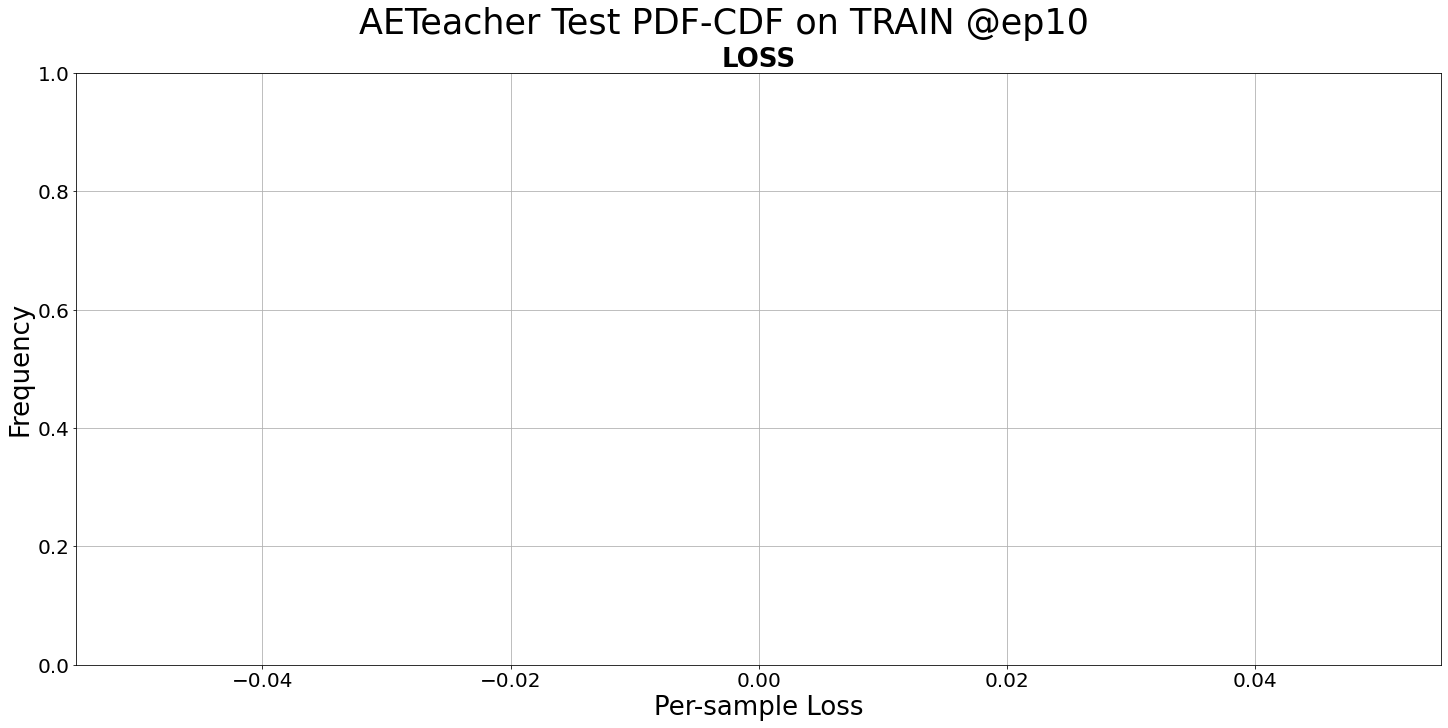

<Figure size 1440x720 with 0 Axes>

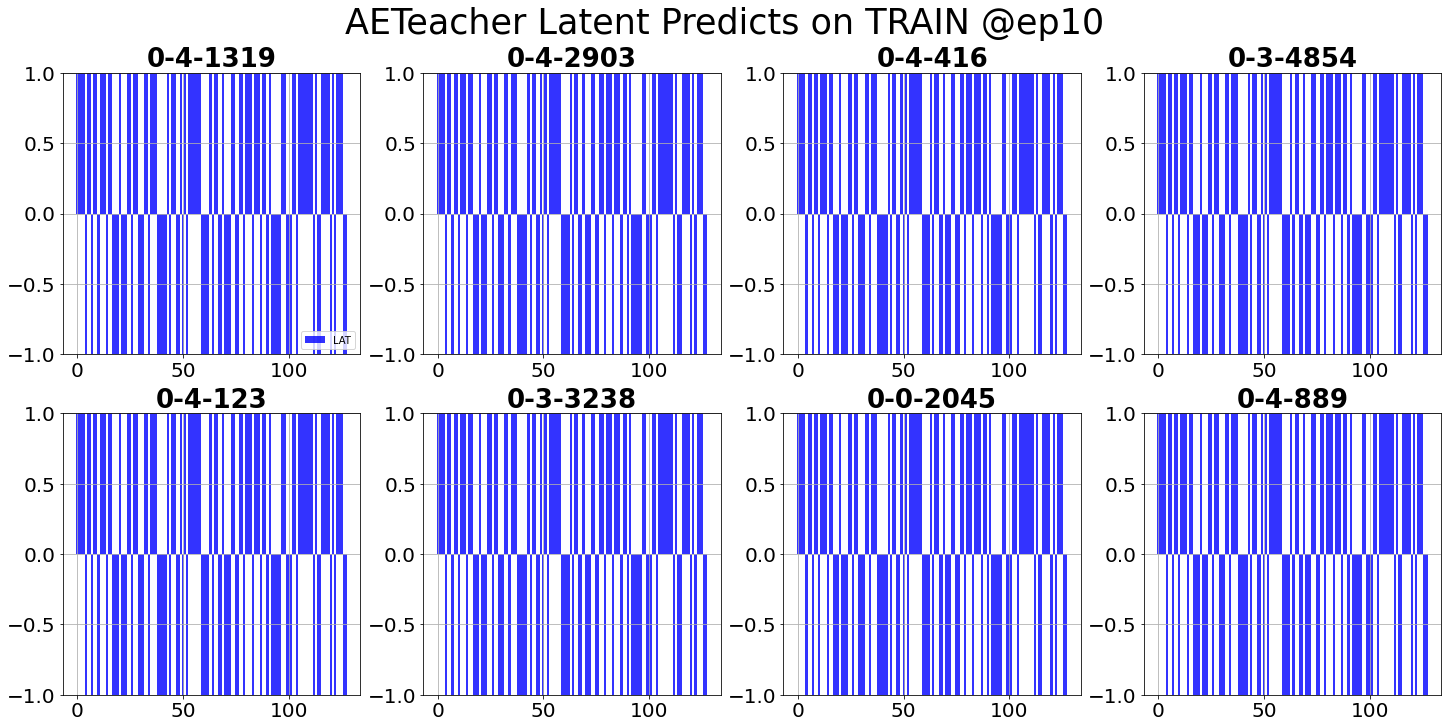

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

<Figure size 1440x720 with 0 Axes>

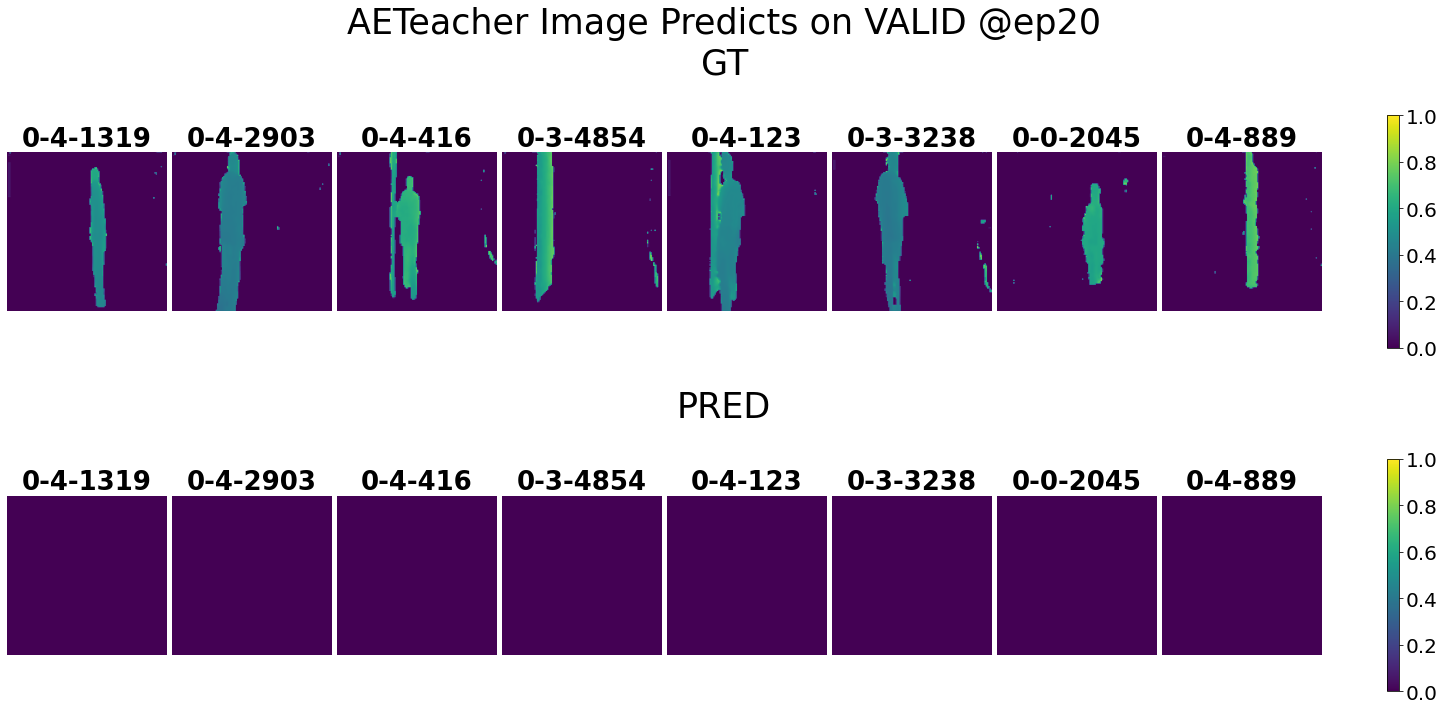

<Figure size 1440x720 with 0 Axes>

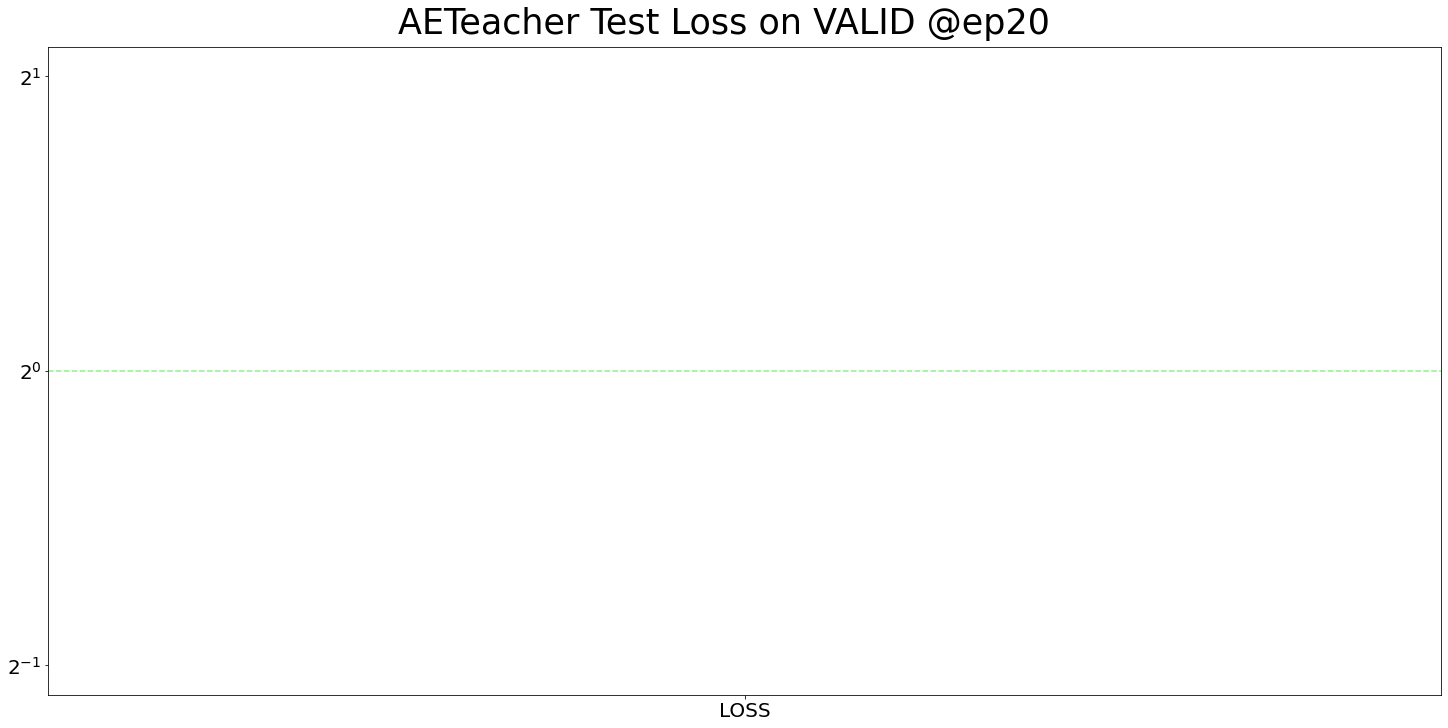

/home/bob/datastore/Models/Loss.py:234: RuntimeWarning: invalid value encountered in true_divide
  cdf = np.cumsum(hist / sum(hist))
/home/bob/datastore/Models/Loss.py:236: RuntimeWarning: invalid value encountered in true_divide
  axes[i].bar(bin_edges[1:], hist / max(hist), width=width, color='blue')


<Figure size 1440x720 with 0 Axes>

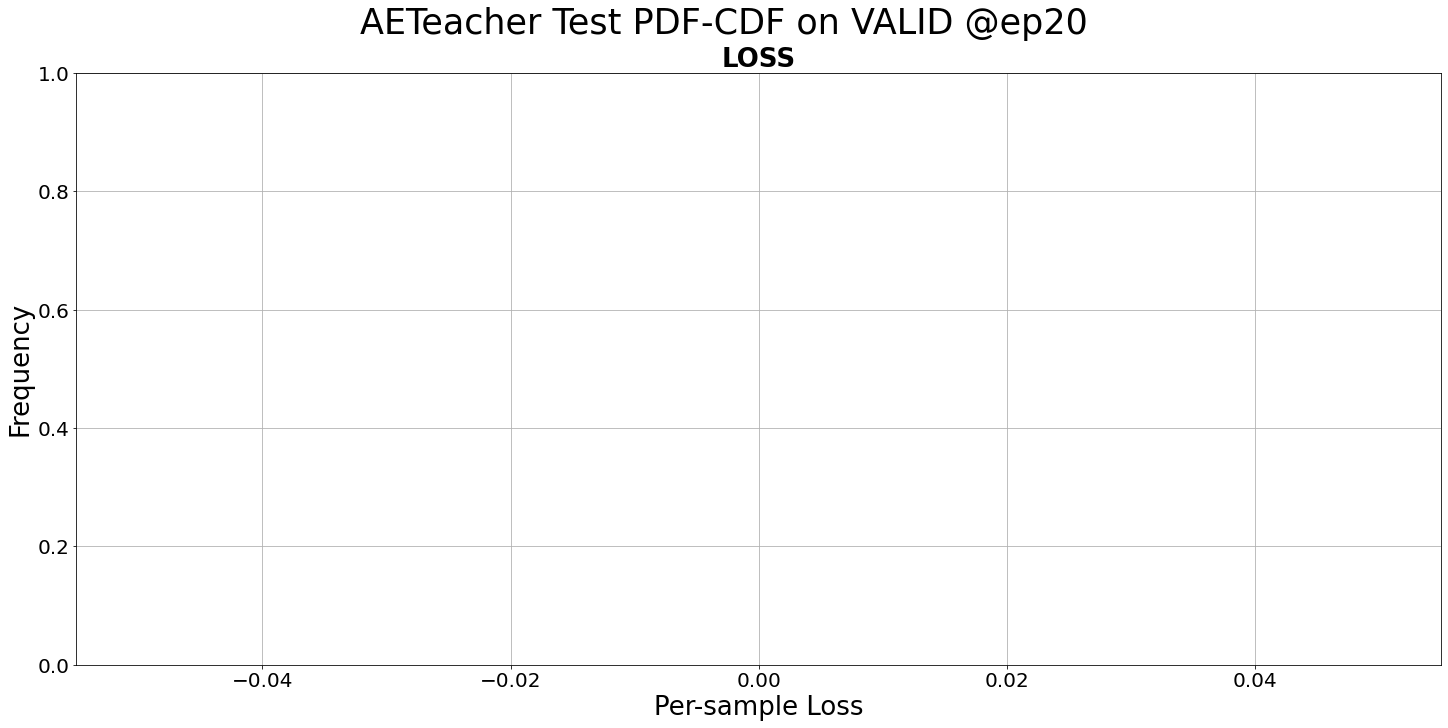

<Figure size 1440x720 with 0 Axes>

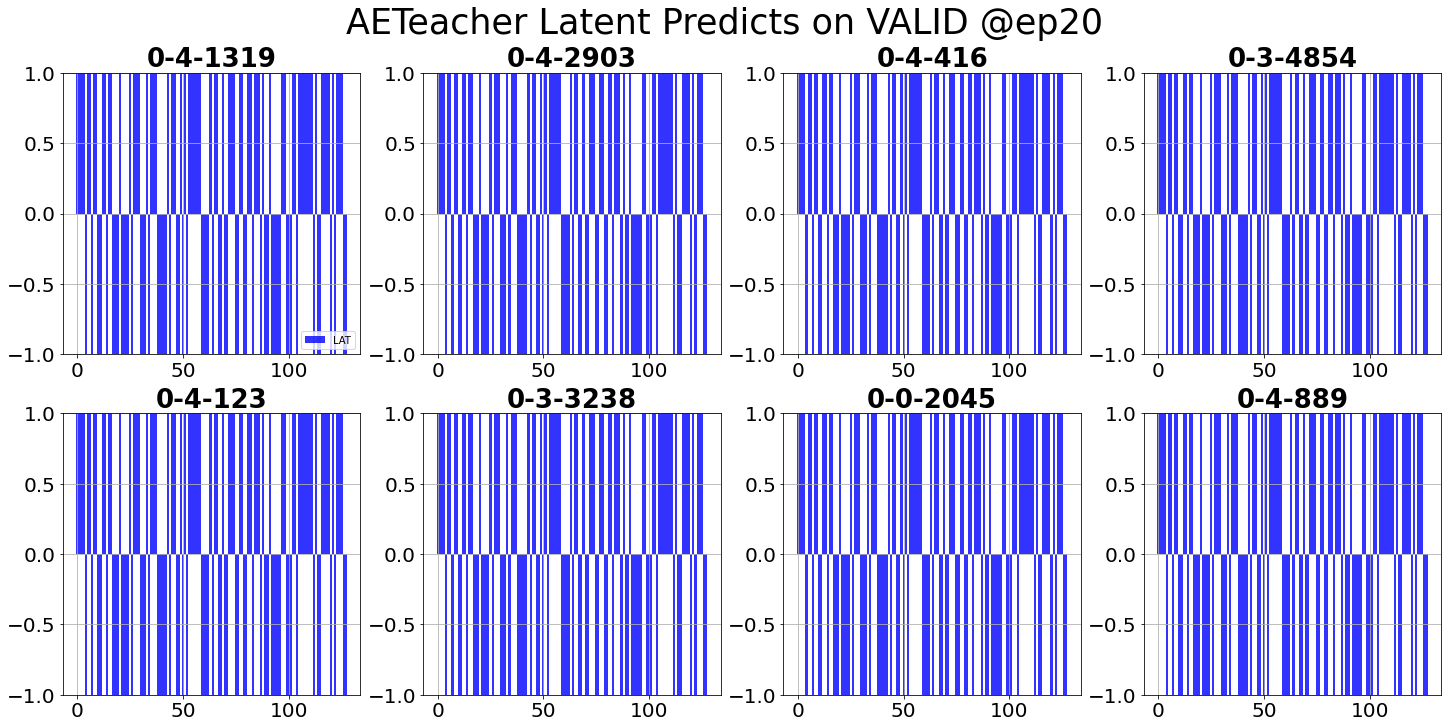

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

In [ ]:
gpu = 4
torch.cuda.set_device(gpu)
run_t()

In [ ]:
import gc
preprocess = DS.Preprocess(new_size=(128, 128))

def run_s():
    for i in range(6):
        data_organizer.gen_plan()
        train_loader, valid_loader, test_loader, current_test = data_organizer.gen_loaders(mode='s')

        imgencoder = TP.ImageEncoder(mode='ae', latent_dim=128)
        imgdecoder = TP.ImageDecoder(latent_dim=128)
        imgen_dict = torch.load(f"../saved/20240917_COMP_sub_{current_test}_TSAE/AETeacher_imgen_best.pth")
        # imgen_dict.pop('fc_mu.0.weight')
        # imgen_dict.pop('fc_mu.0.bias')
        # imgen_dict.pop('fc_logvar.0.weight')
        # imgen_dict.pop('fc_logvar.0.bias')
        imgencoder.load_state_dict(imgen_dict)
        imgdecoder.load_state_dict(torch.load(f"../saved/20240917_COMP_sub_{current_test}_TSAE/AETeacher_imgde_best.pth"))

        TSAE_S_trainer = TP.CompStudentTrainer(name='AEStudent', mask=False, mode='ae',
                                                 networks=[TP.CSIEncoder(mode='tsae', latent_dim=128, middle_dim=512*7*75), 
                                                           imgencoder, 
                                                           imgdecoder],
                                                 lr=1e-4, epochs=10, cuda=gpu,
                                                 preprocess = preprocess,
                                                 loss_optimizer = {'LOSS': [torch.optim.Adam, 1e-4]},
                                                 train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader, notion=f'{name}_{current_test}_TSAE')
        tsae_s_trained = TSAE_S_trainer.schedule()

### Teacher-Student VAE

==========20240906_Sub_COMP_higashinaka_TSVAE VAETeacher Training starting==========


  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:13<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 1 out of 5. Decay rate = 0.5


  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:06<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 2 out of 5. Decay rate = 0.25


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:03<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 3 out of 5. Decay rate = 0.125


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:06<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 4 out of 5. Decay rate = 0.0625


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:01<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 5 out of 5. Decay rate = 0.03125Early Stopping triggered. Saving @ epoch 405...

Total training time: 8110.734928369522 sec


<Figure size 432x288 with 0 Axes>

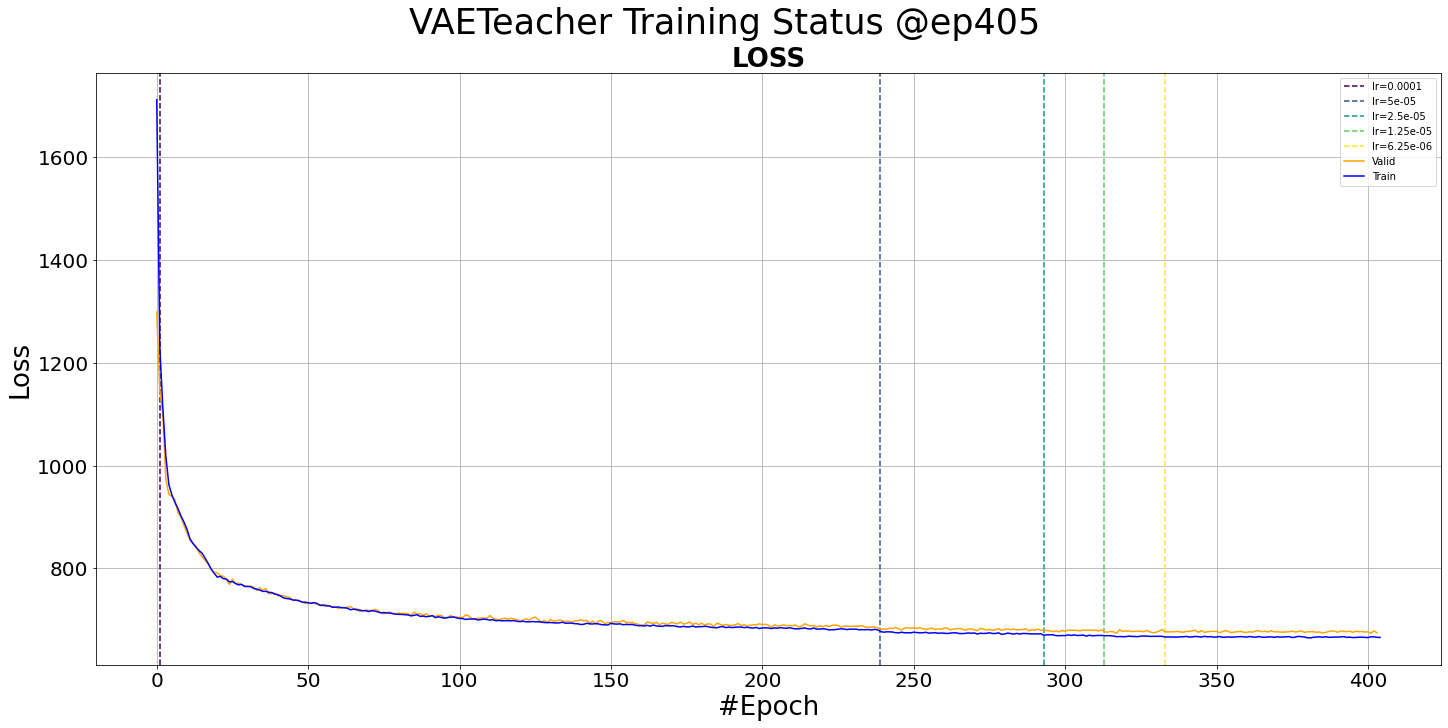

==========20240906_Sub_COMP_higashinaka_TSVAE VAETeacher Test starting==========



  0%|          |[00:00<?]


Test finished. Average loss={'LOSS': 507.4338922076306}

Total training time: 22.18741536140442 sec


<Figure size 1440x720 with 0 Axes>

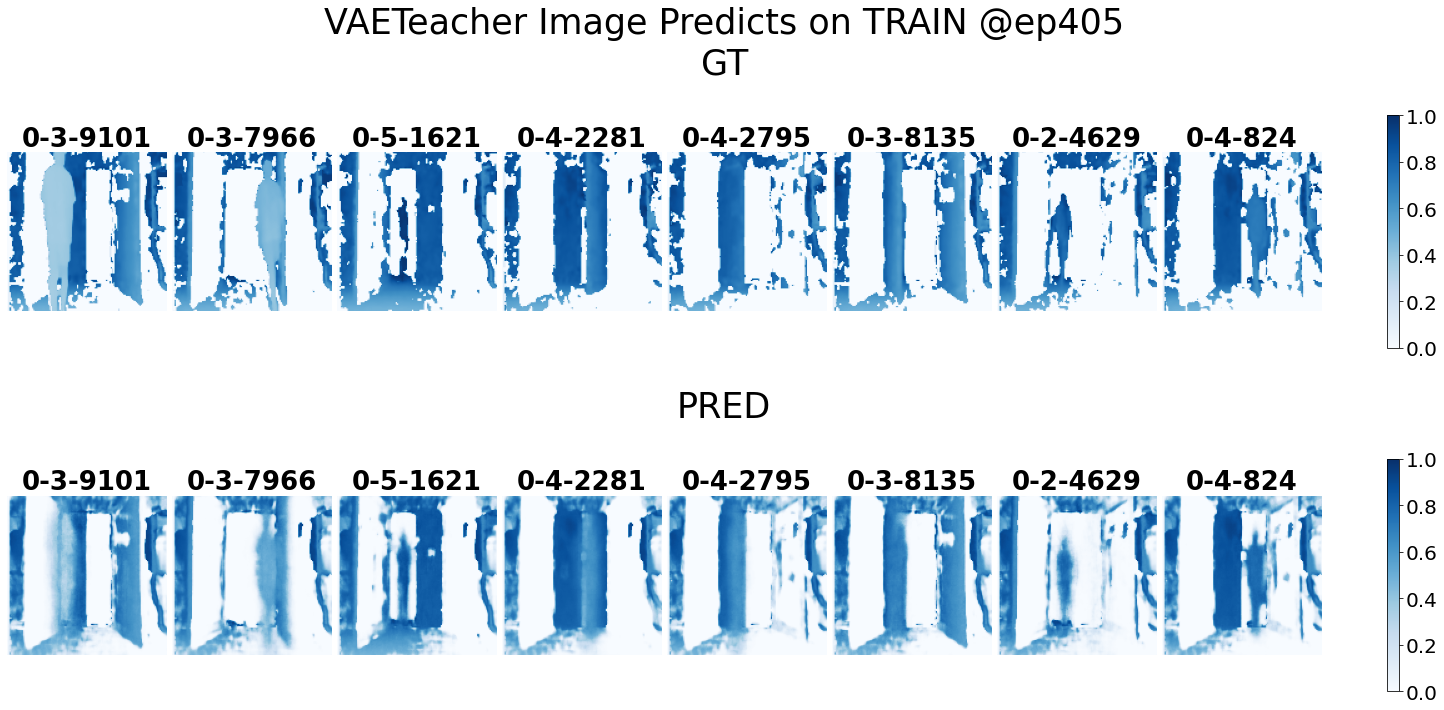

<Figure size 1440x720 with 0 Axes>

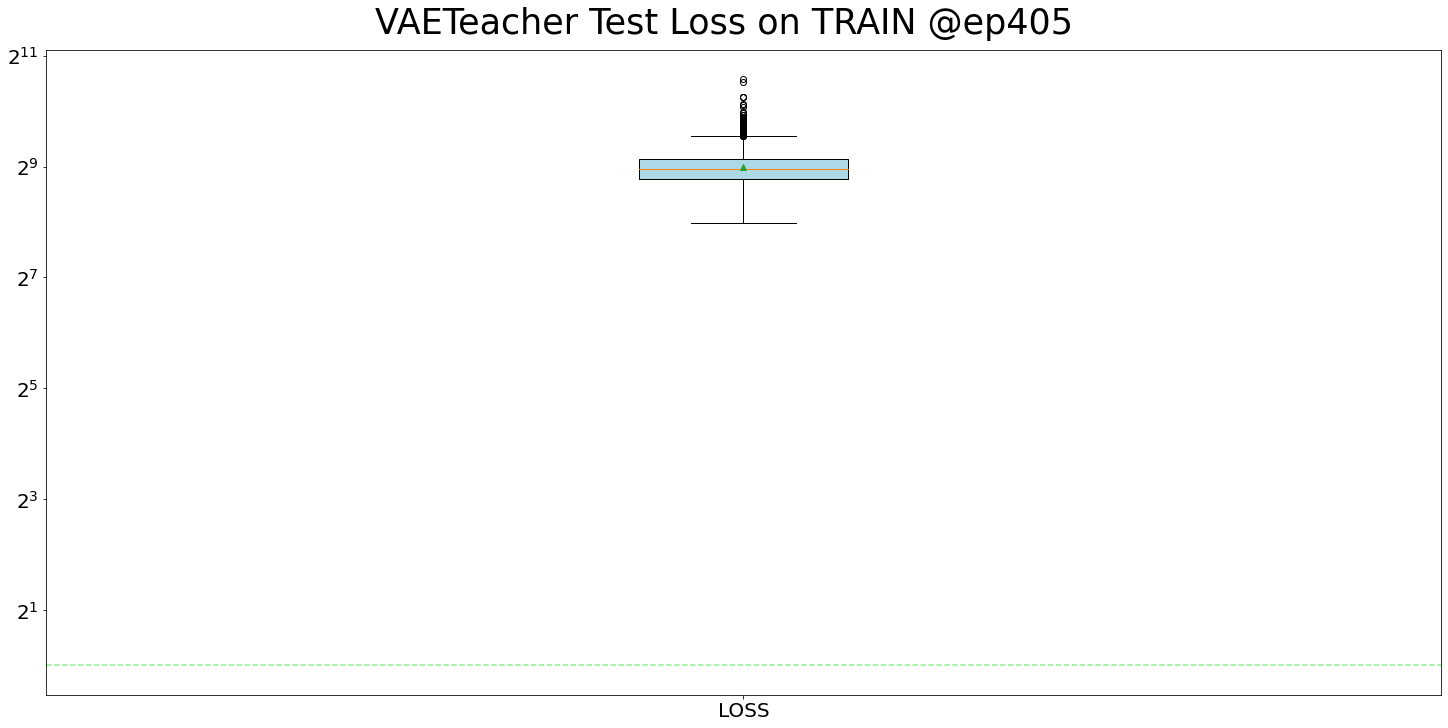

<Figure size 1440x720 with 0 Axes>

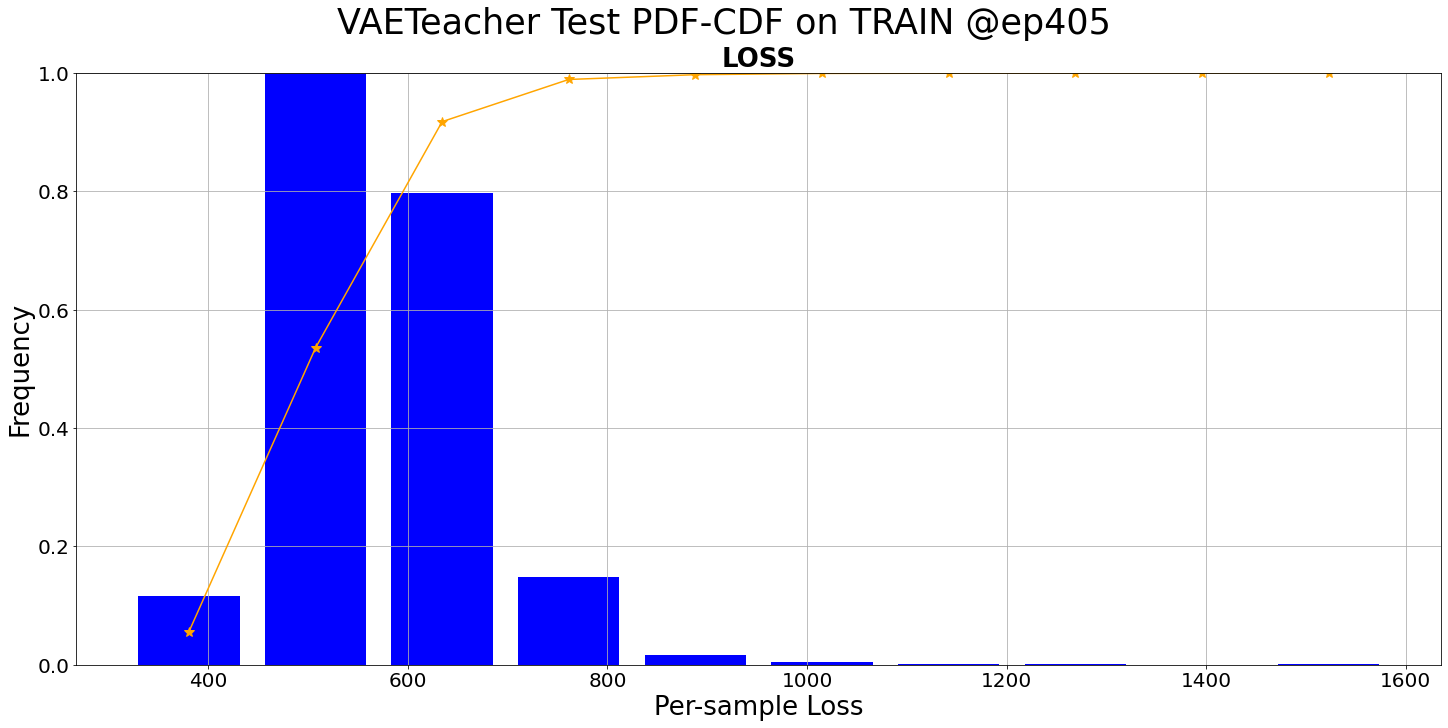

==========20240906_Sub_COMP_higashinaka_TSVAE VAETeacher Test starting==========



  0%|          |[00:00<?]


Test finished. Average loss={'LOSS': 739.4901828097779}

Total training time: 18.79294490814209 sec


<Figure size 1440x720 with 0 Axes>

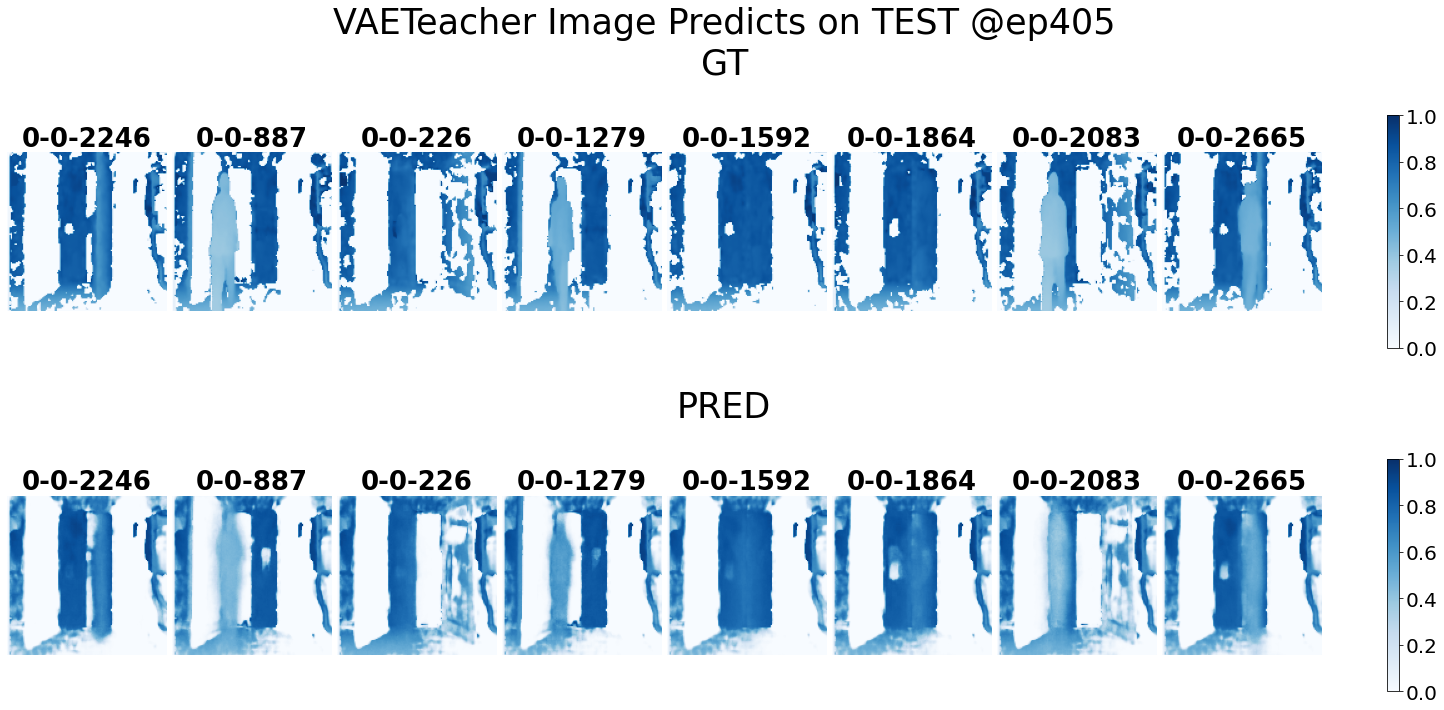

<Figure size 1440x720 with 0 Axes>

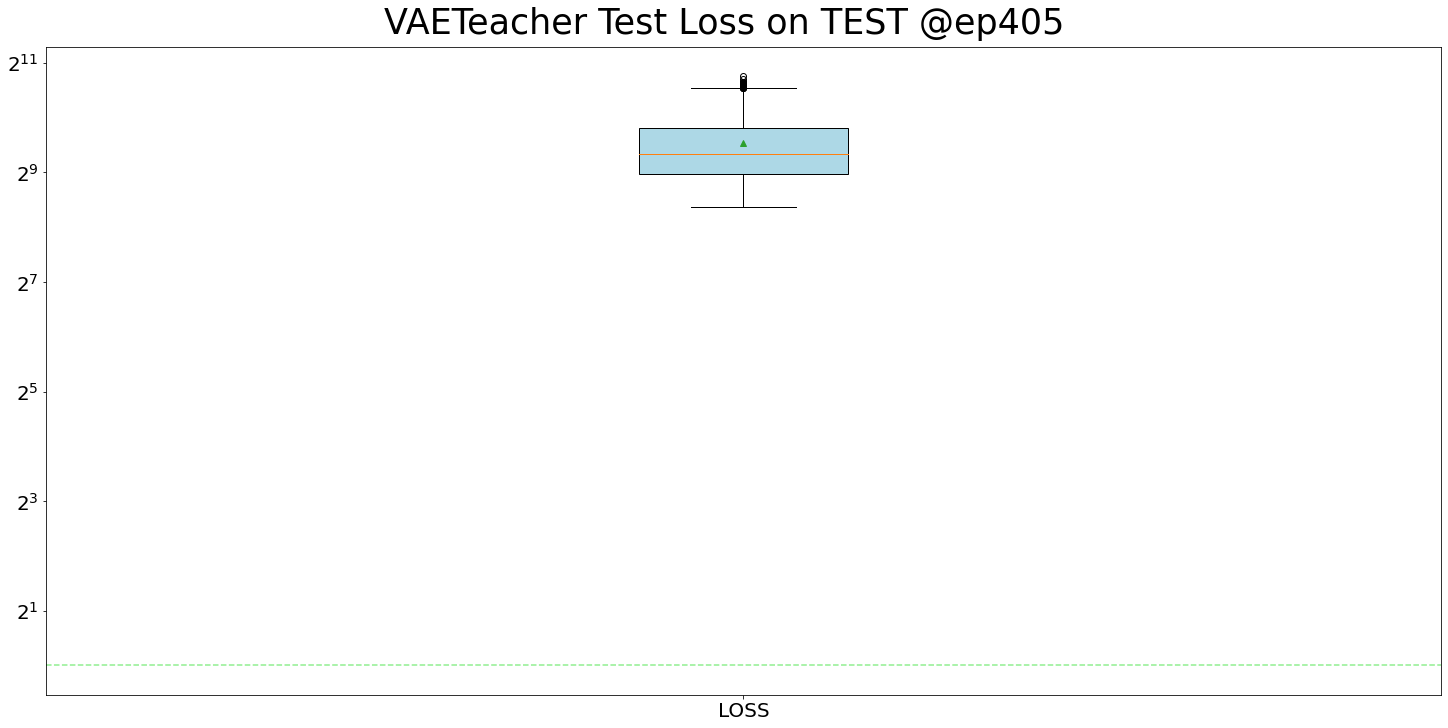

<Figure size 1440x720 with 0 Axes>

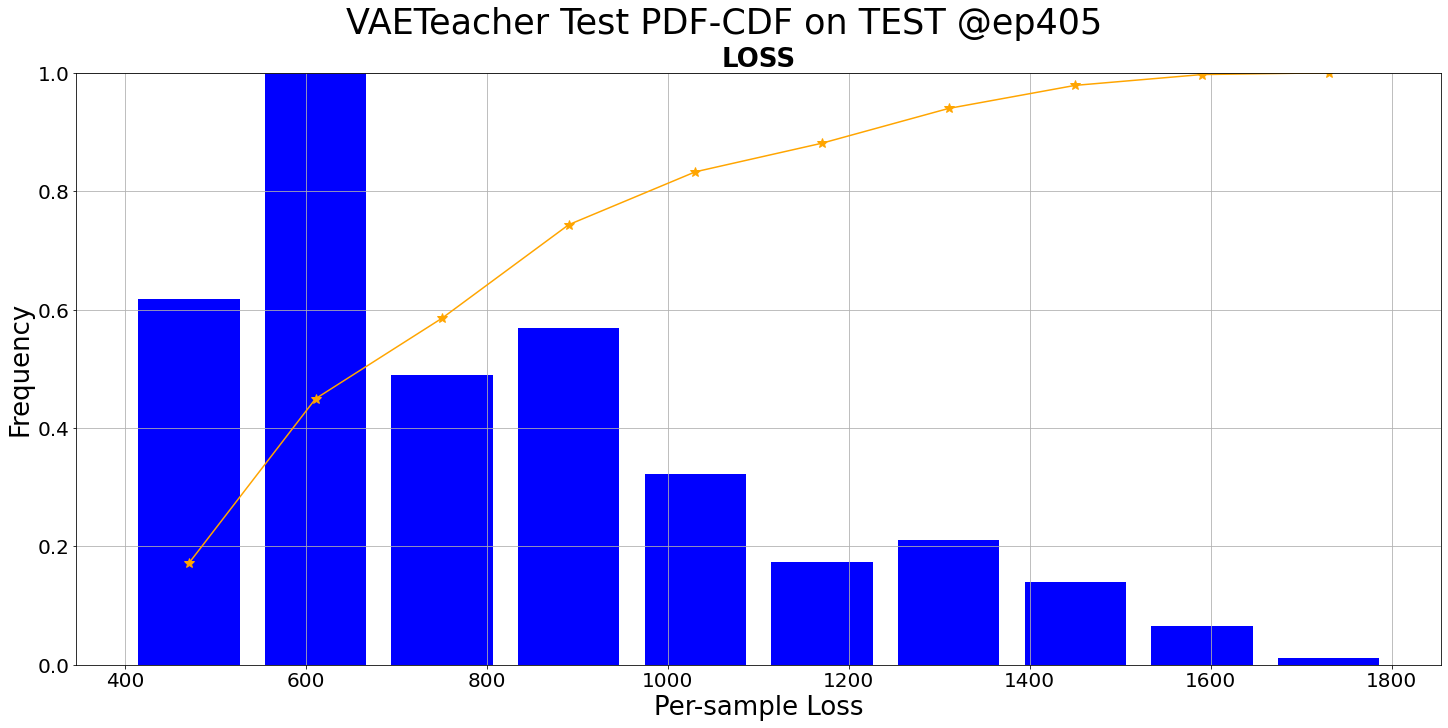

Saving preds: PRED...
Saving preds: LAT...
Saving preds: TAG...
All saved!

VAETeacher schedule Completed!


In [5]:
TSVAE_T_trainer = TP.CompTrainer(name='VAETeacher', mask=False, mode='vae_t',
                                 networks=[TP.ImageEncoder(latent_dim=128, vae=True), 
                                           TP.ImageDecoder(latent_dim=128)],
                                 lr=1e-4, epochs=10, cuda=gpu,
                                 preprocess = preprocess,
                                 modality = {'rimg', 'tag'},
                                 loss_optimizer = {'LOSS': [torch.optim.Adam, 1e-4]},
                                 train_loader=t_train_loader, valid_loader=t_valid_loader, test_loader=t_test_loader, notion=f'{name}_{current_test}_TSVAE')
tsvae_t_trained = TSVAE_T_trainer.schedule()

In [ ]:
csiencoder = TP.CSIEncoder(latent_dim=128, mode='tsvae', middle_dim=128)
imgencoder = TP.ImageEncoder(latent_dim=128, vae=True)
imgdecoder = TP.ImageDecoder(latent_dim=128)
# imgencoder.load_state_dict(torch.load(f"../saved/20240906_Day_COMP_A308T_TSVAE/VAETeacher_imgen_best.pth"))
# imgdecoder.load_state_dict(torch.load(f"../saved/20240906_Day_COMP_A308T_TSVAE/VAETeacher_imgde_best.pth"))

TSVAE_S_trainer = TP.CompStudentTrainer(name='VAEStudent', mask=False, mode='vae',
                                         networks=[csiencoder,
                                                   TSVAE_T_trainer.models['imgen'], 
                                                   TSVAE_T_trainer.models['imgde']],
                                         lr=1e-4, epochs=10, cuda=gpu,
                                         preprocess = preprocess,
                                         loss_optimizer = {'LOSS': [torch.optim.Adam, 1e-4]},
                                         train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader, notion=f'{name}_{current_test}_TSAE')
tsvae_s_trained = TSVAE_S_trainer.schedule()

==========20240906_Sub_COMP_higashinaka_TSAE VAEStudent Training starting==========


  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]